In [123]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree

In [124]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


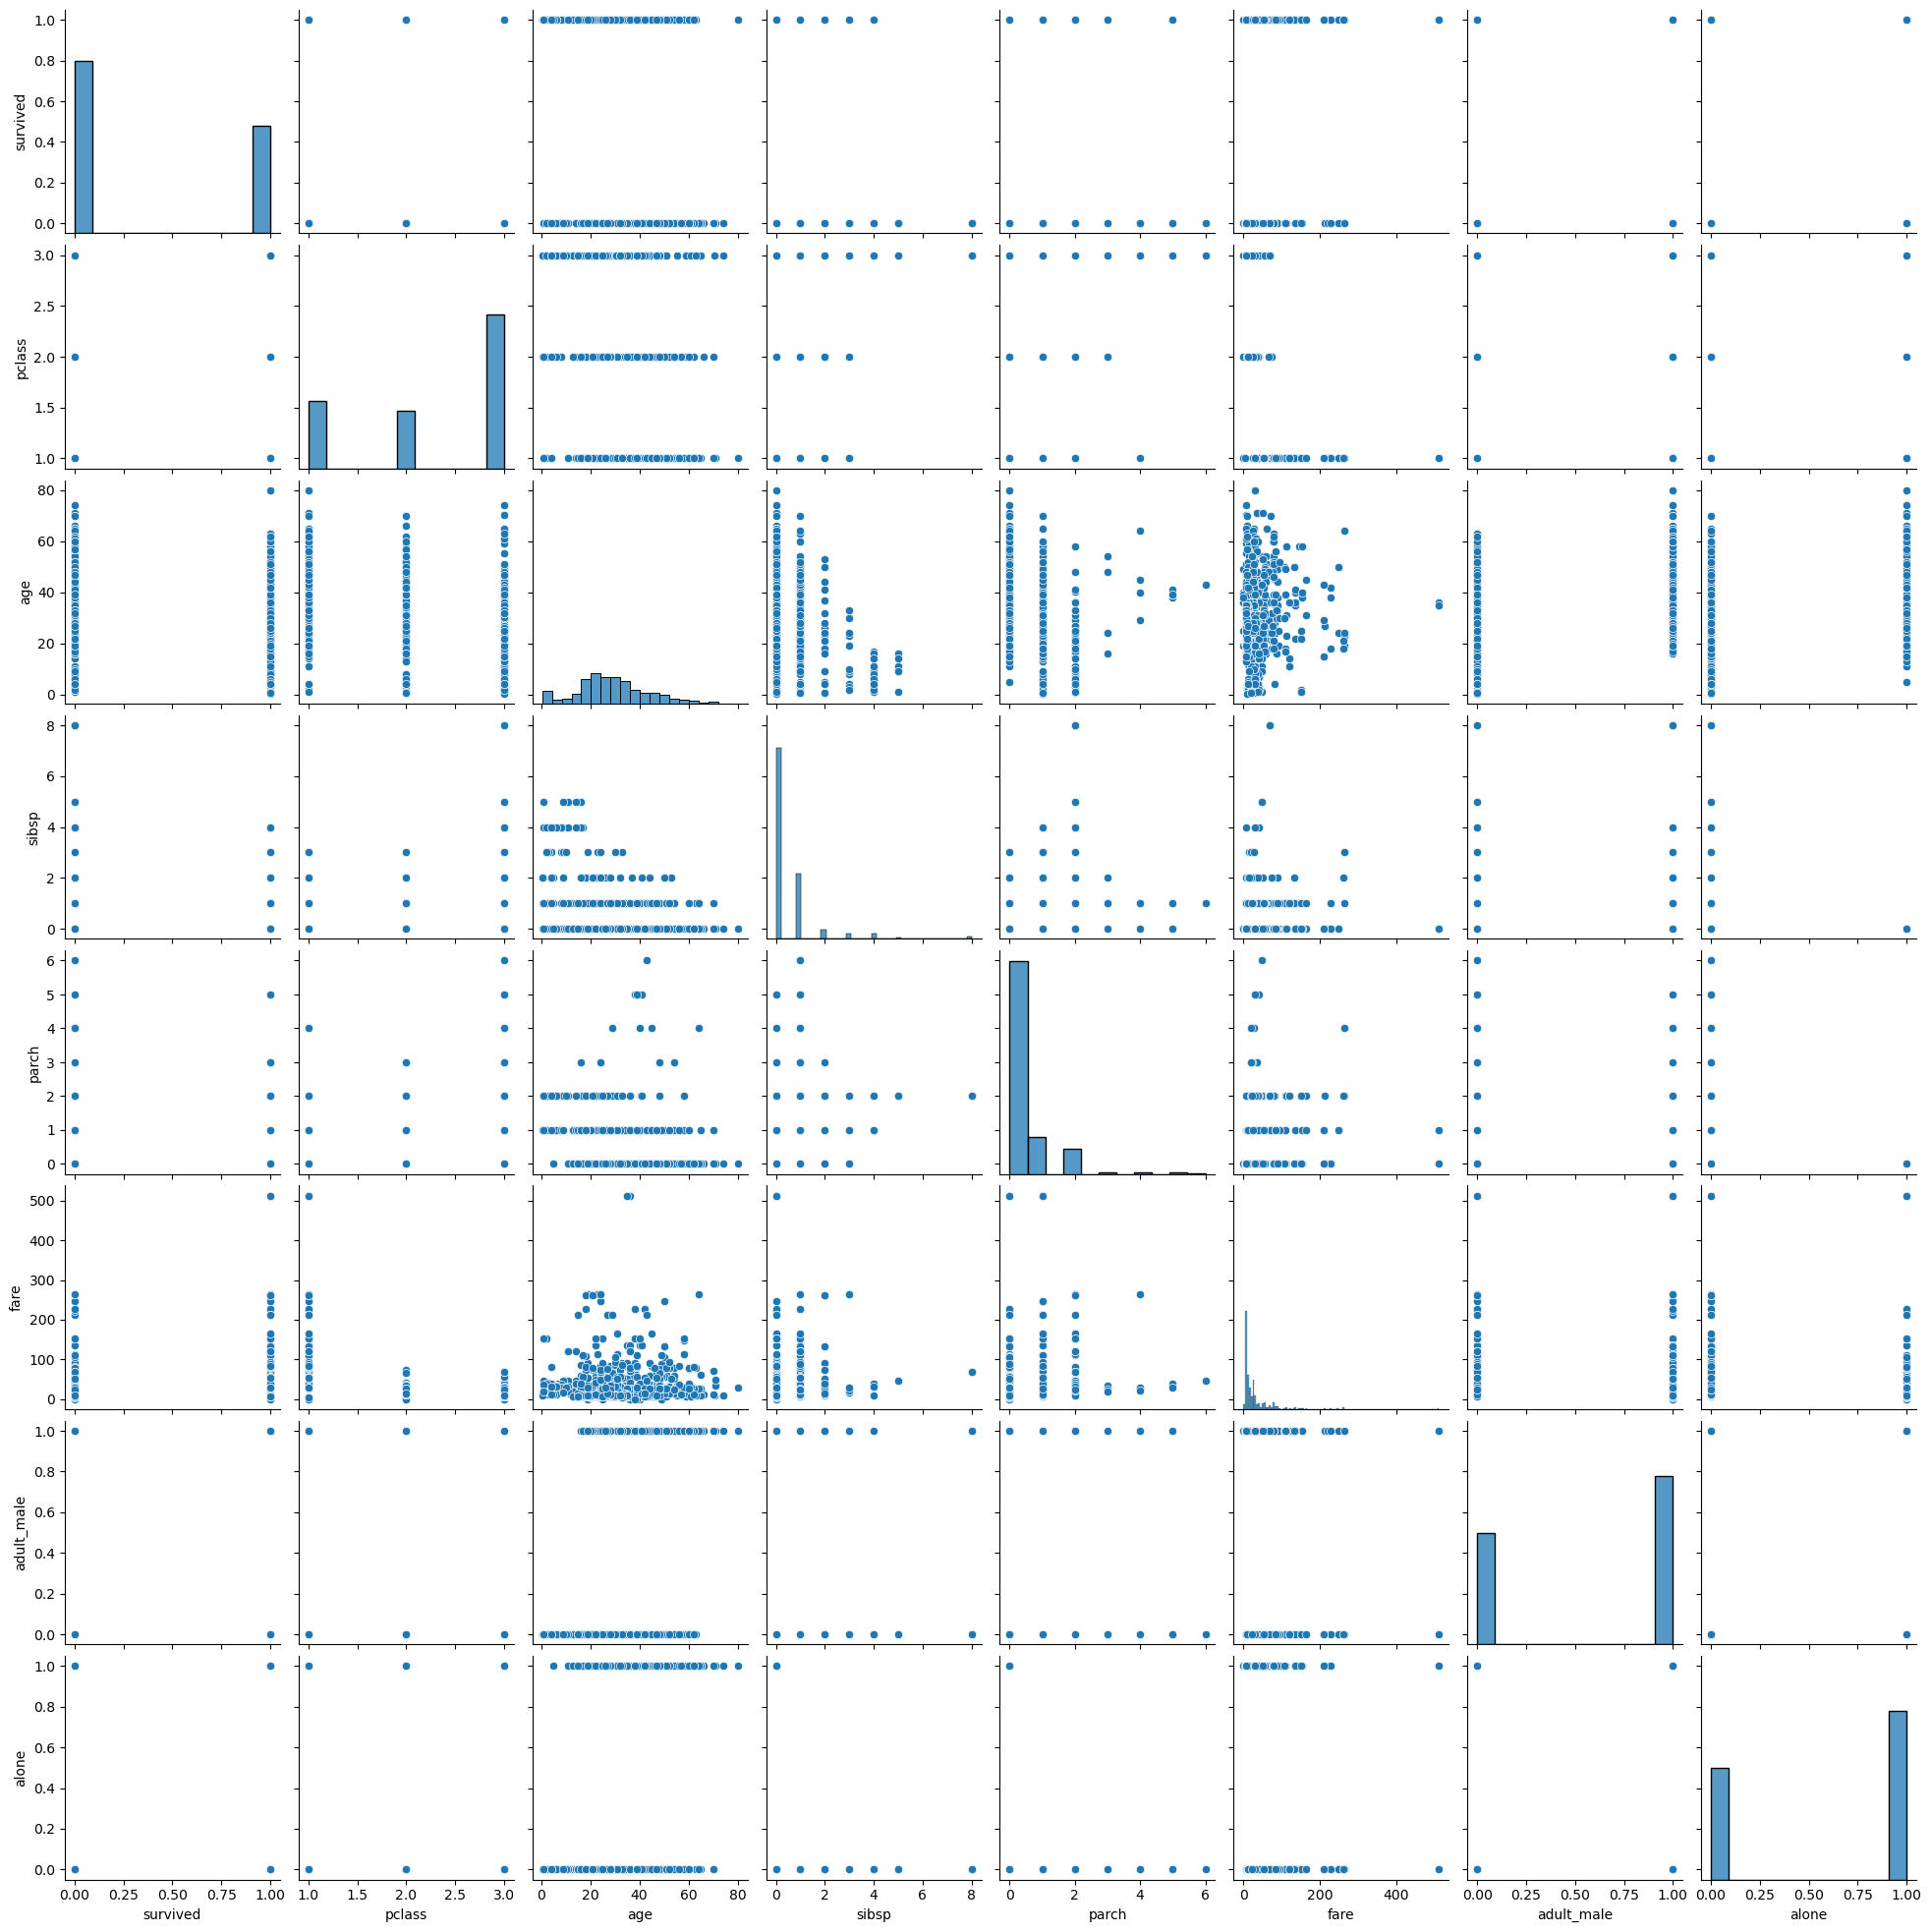

In [125]:
sns.pairplot(df)


In [126]:
df["alive"] = df["alive"].replace("yes", 1)
df["alive"] = df["alive"].replace("no", 0)

In [127]:
X = df[["pclass", "sex", "age", "sibsp", "parch", "fare"]]
y = df["alive"]

In [128]:
X.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [129]:
X.head

<bound method NDFrame.head of      pclass     sex   age  sibsp  parch     fare
0         3    male  22.0      1      0   7.2500
1         1  female  38.0      1      0  71.2833
2         3  female  26.0      0      0   7.9250
3         1  female  35.0      1      0  53.1000
4         3    male  35.0      0      0   8.0500
..      ...     ...   ...    ...    ...      ...
886       2    male  27.0      0      0  13.0000
887       1  female  19.0      0      0  30.0000
888       3  female   NaN      1      2  23.4500
889       1    male  26.0      0      0  30.0000
890       3    male  32.0      0      0   7.7500

[891 rows x 6 columns]>

In [130]:
X = pd.get_dummies(X, columns = ['sex'])

In [131]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [132]:
X.age.fillna(value = X['age'].mean(), inplace = True)

In [133]:
X.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

In [134]:
y.isnull().sum()

0

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [136]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [137]:
y_pred = model.predict(X_test)

In [138]:
print("Acccuracy: ", accuracy_score(y_test, y_pred))
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))

Acccuracy:  0.7910447761194029
precision_score:  0.711340206185567
recall_score:  0.711340206185567
f1_score:  0.711340206185567


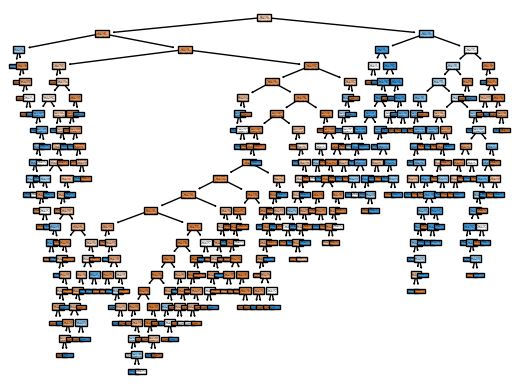

<Figure size 640x480 with 0 Axes>

In [139]:
tree.plot_tree(model.fit(X,y), filled = True)
plt.show()
plt.savefig("decision_tree.pdf", format = "pdf", dpi = 300)

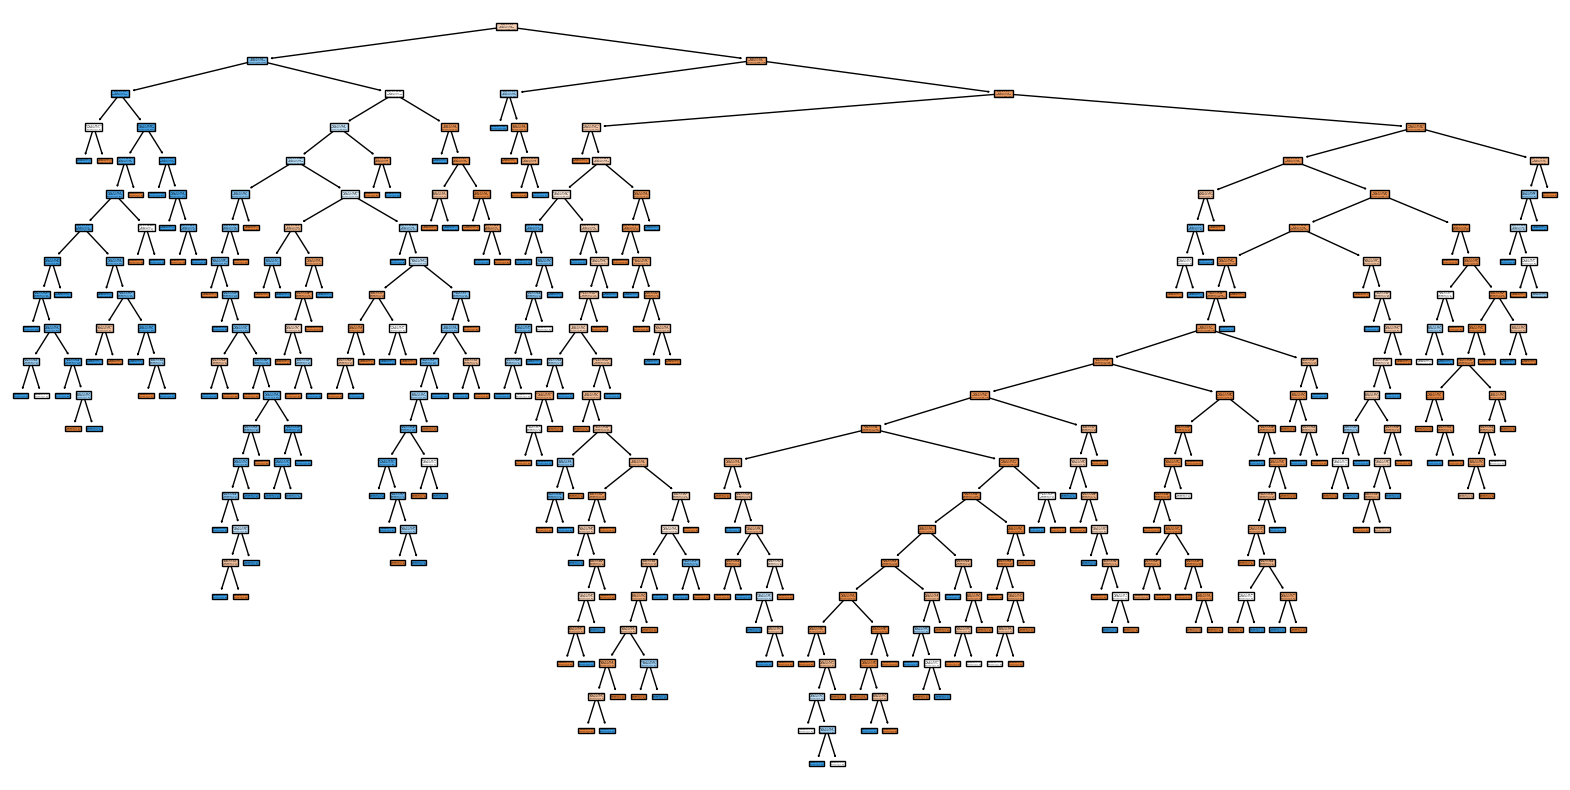

<Figure size 640x480 with 0 Axes>

In [140]:
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X,y), filled = True)
plt.show()
plt.savefig("decision_tree.pdf", format = "pdf", dpi = 300)

In [141]:
# confusion matrix
from sklearn.metrics import confusion_matrix

#cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
cm = confusion_matrix(y_test, y_pred)
cm

array([[143,  28],
       [ 28,  69]])

<Axes: >

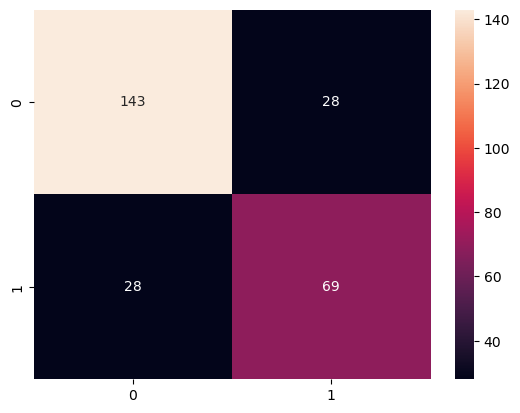

In [142]:
import numpy as np
sns.heatmap(cm, annot = True, fmt='g')

# **KNN**

In [143]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors= 8)
# X = df[["pclass", "sex", "age", "sibsp", "parch", "fare"]]
# y = df["alive"]
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm


array([[144,  27],
       [ 58,  39]])

<Axes: >

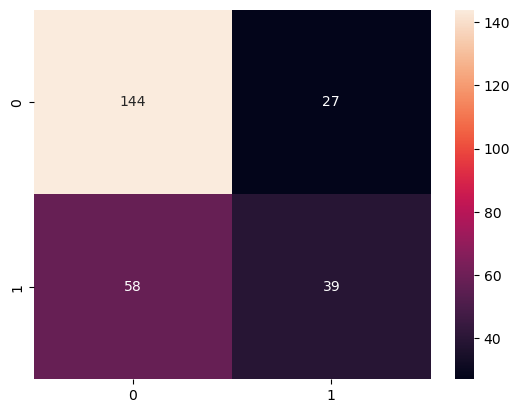

In [144]:
sns.heatmap(cm, annot = True, fmt='g')

In [145]:
print("Acccuracy: ", accuracy_score(y_test, y_pred))
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))

Acccuracy:  0.6828358208955224
precision_score:  0.5909090909090909
recall_score:  0.4020618556701031
f1_score:  0.4785276073619632


In [146]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       171
           1       0.59      0.40      0.48        97

    accuracy                           0.68       268
   macro avg       0.65      0.62      0.63       268
weighted avg       0.67      0.68      0.67       268



# **Random Forest**

In [147]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
# X = df[["pclass", "sex", "age", "sibsp", "parch", "fare"]]
# y = df["alive"]
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[155,  16],
       [ 21,  76]])

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       171
           1       0.83      0.78      0.80        97

    accuracy                           0.86       268
   macro avg       0.85      0.84      0.85       268
weighted avg       0.86      0.86      0.86       268



<Axes: >

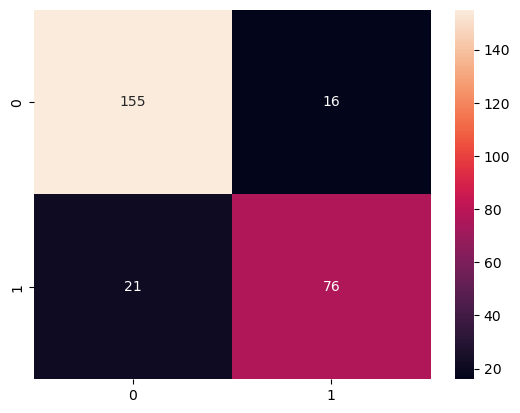

In [149]:
sns.heatmap(cm, annot = True, fmt='g')

In [150]:
print("Acccuracy: ", accuracy_score(y_test, y_pred))
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))

Acccuracy:  0.8619402985074627
precision_score:  0.8260869565217391
recall_score:  0.7835051546391752
f1_score:  0.8042328042328043


# **Logistic Regression**

In [151]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# X = df[["pclass", "sex", "age", "sibsp", "parch", "fare"]]
#y = df["alive"]
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[146,  25],
       [ 28,  69]])

<Axes: >

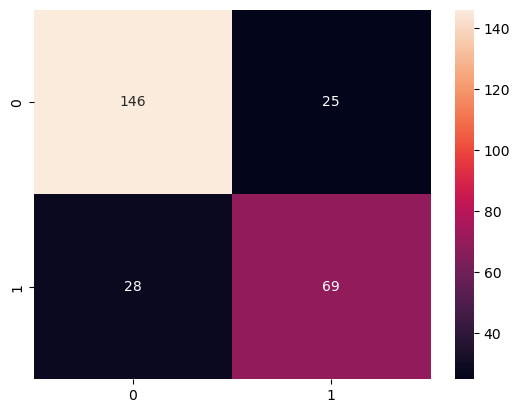

In [152]:
sns.heatmap(cm, annot = True, fmt='g')

In [153]:
print("Acccuracy: ", accuracy_score(y_test, y_pred))
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))

Acccuracy:  0.8022388059701493
precision_score:  0.7340425531914894
recall_score:  0.711340206185567
f1_score:  0.7225130890052357


# **SVM**

In [154]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[156,  15],
       [ 71,  26]])

<Axes: >

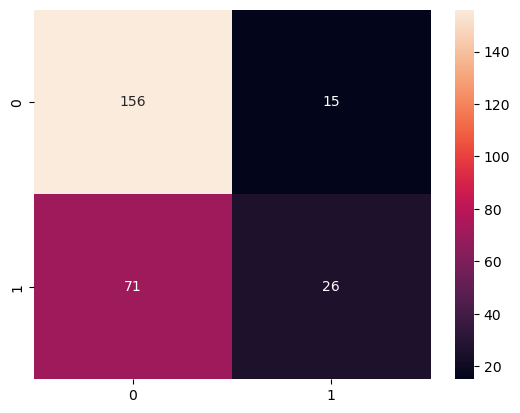

In [155]:
sns.heatmap(cm, annot = True, fmt='g')

In [156]:
print("Acccuracy: ", accuracy_score(y_test, y_pred))
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))

Acccuracy:  0.6791044776119403
precision_score:  0.6341463414634146
recall_score:  0.26804123711340205
f1_score:  0.3768115942028985


# **NAIVE Bayes**

In [157]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[148,  23],
       [ 28,  69]])

<Axes: >

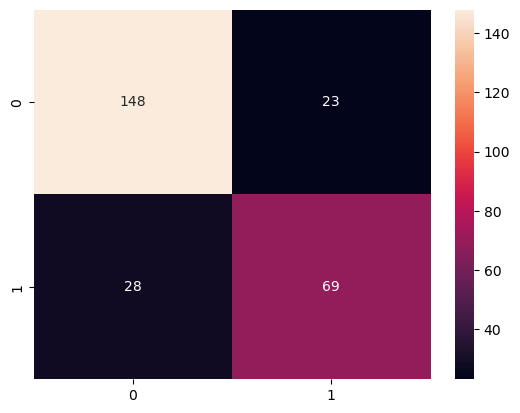

In [159]:
sns.heatmap(cm, annot = True, fmt='g')

In [158]:
print("Acccuracy: ", accuracy_score(y_test, y_pred))
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))

Acccuracy:  0.8097014925373134
precision_score:  0.75
recall_score:  0.711340206185567
f1_score:  0.7301587301587301


In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = [LogisticRegression(), RandomForestClassifier(), SVC(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier()]

# Train the models
for model in models:
    model.fit(X_train, y_train)
    
scores = []
for model in models:
    score = accuracy_score(model.predict(X_test), y_test)
    scores.append(score)

    
# Create a table
table = pd.DataFrame({
    "Model": [model.__class__.__name__ for model in models],
    "Accuracy": scores
})

# Print the table
print(table.to_string())

# Print the best model
best_model = models[np.argmax(scores)]
print("\n The best model is:", best_model.__class__.__name__, "with an accuracy of", scores[np.argmax(scores)])

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    Model  Accuracy
0      LogisticRegression  0.802239
1  RandomForestClassifier  0.839552
2                     SVC  0.679104
3    KNeighborsClassifier  0.720149
4              GaussianNB  0.809701
5  DecisionTreeClassifier  0.772388

 The best model is: RandomForestClassifier with an accuracy of 0.8395522388059702
